In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('./dataset/indian_liver_patient.csv')

data = data.dropna()

# tratando a coluna com texto ['Gender']
encoder = LabelEncoder()
data["Gender"] = encoder.fit_transform(data["Gender"])

print(data.shape)

data.info()

data.head()

(579, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    int32  
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 52.0 KB


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


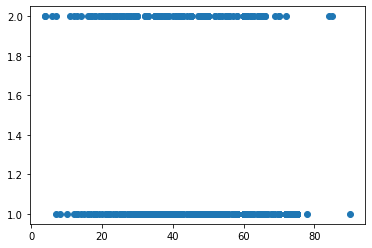

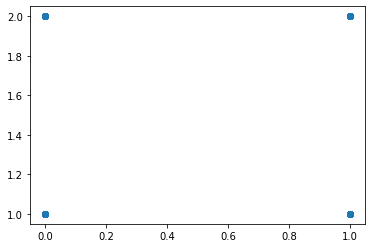

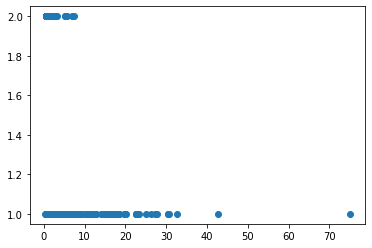

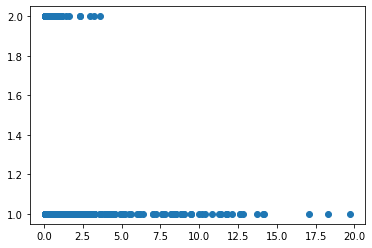

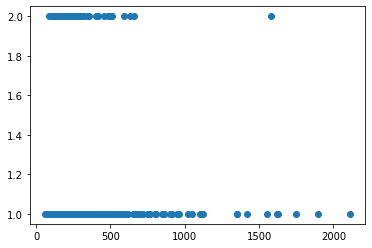

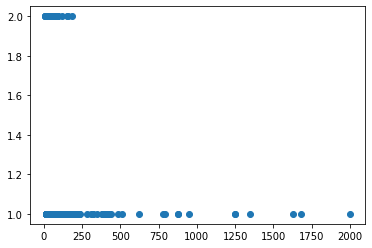

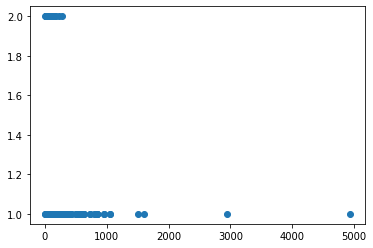

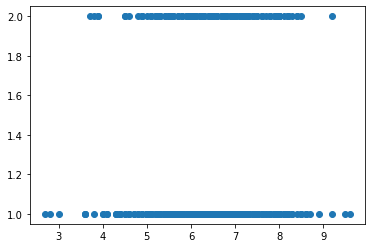

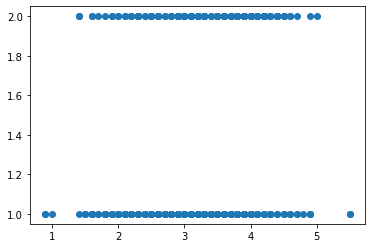

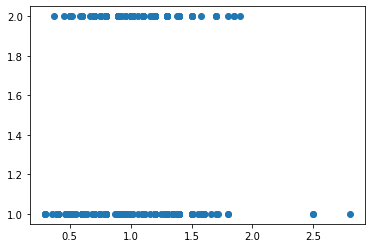

In [2]:
X = data.drop(columns=["Dataset"])
y = data["Dataset"]
X.shape, y.shape, set(y)

for column in X.columns:    
    plt.scatter(X[column], y)
    plt.show()

# coluna que apresentou melhor resultado
Xcol = np.array(X["Albumin"]).astype(float).reshape(-1,1)

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer

modelo = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

classifiers = [LogisticRegression(), KNeighborsClassifier()]

scoring = { "accuracy": make_scorer(accuracy_score), "precision": make_scorer(precision_score) }

for classifier in classifiers:
    modelo.set_params(classifier = classifier)
    scores = cross_validate(modelo, Xcol, y, cv=10, scoring=scoring)
    print('\n', 'column - ', str(classifier), '\n')
    for key, values in scores.items():        
        print(key, ' mean ', values.mean())
        print(key, ' std ', values.std())



 column -  LogisticRegression() 

fit_time  mean  0.0033629417419433595
fit_time  std  0.004302645084997517
score_time  mean  0.0015325069427490235
score_time  std  0.0010480867167612443
test_accuracy  mean  0.7115849969751966
test_accuracy  std  0.013105639189891055
test_precision  mean  0.7140048396854205
test_precision  std  0.009436465511074731

 column -  KNeighborsClassifier() 

fit_time  mean  0.0016320466995239258
fit_time  std  0.0011064021460324926
score_time  mean  0.005478215217590332
score_time  std  0.005238609505089727
test_accuracy  mean  0.6822746521476104
test_accuracy  std  0.06877636684023304
test_precision  mean  0.7382377622302723
test_precision  std  0.03462628070294782
